In [2]:
from dask.distributed import Client

client = Client(n_workers=4)
client

c:\Users\Acer\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61633 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:61634' processes=4 threads=8, memory=19.88 GiB>

In [5]:
import os
import dask

# %%time #check runtime

import numpy as np
import cv2 
from scipy import ndimage
from matplotlib import pyplot as plt
import warnings

import time

<Figure size 960x800 with 0 Axes>

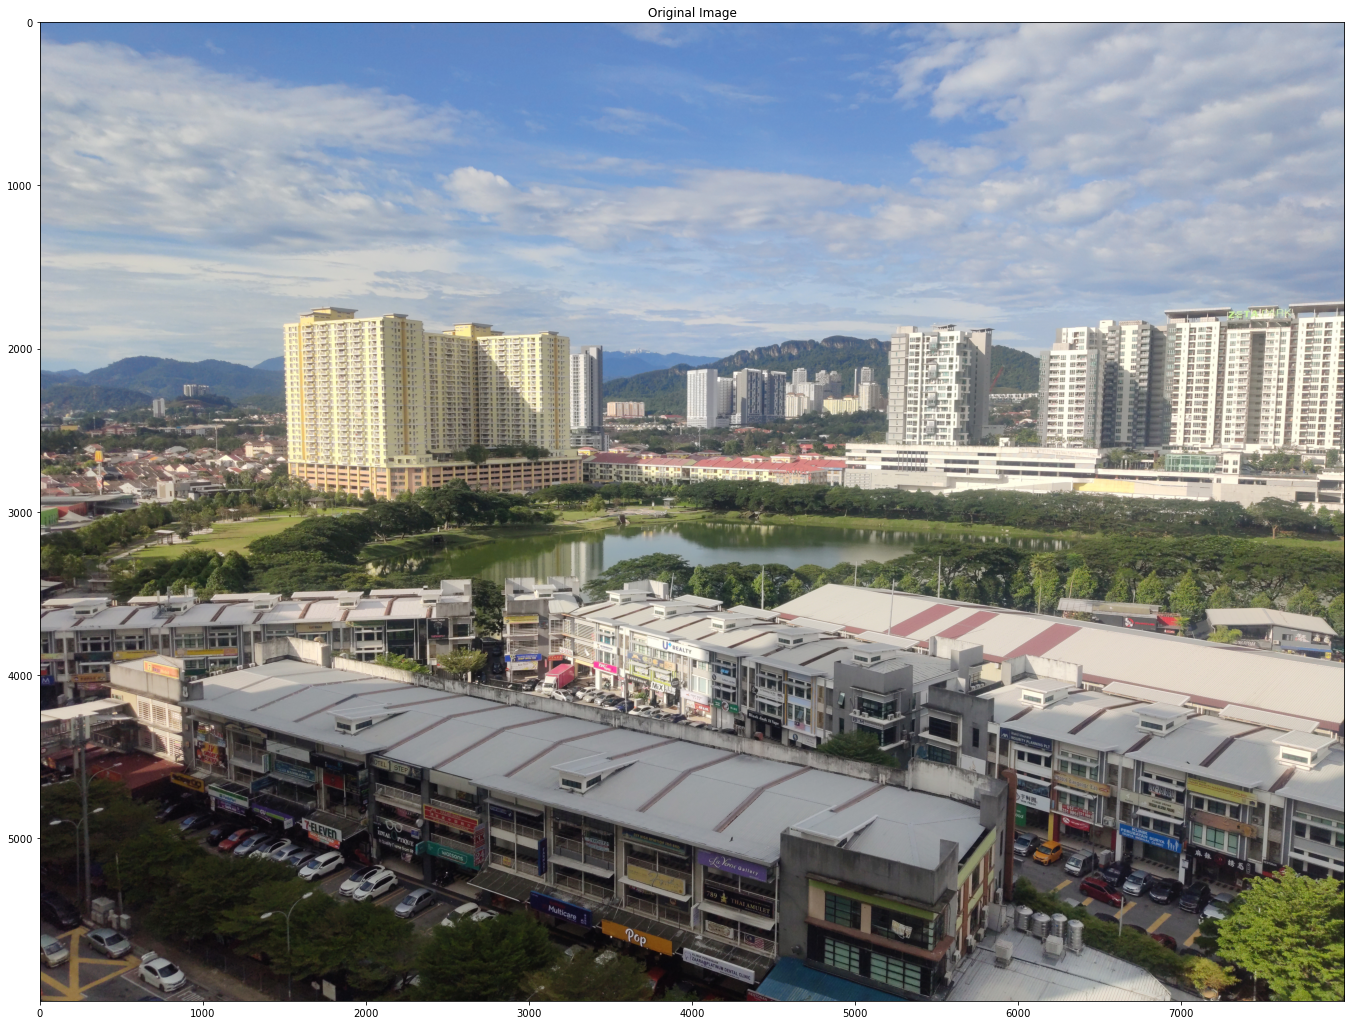

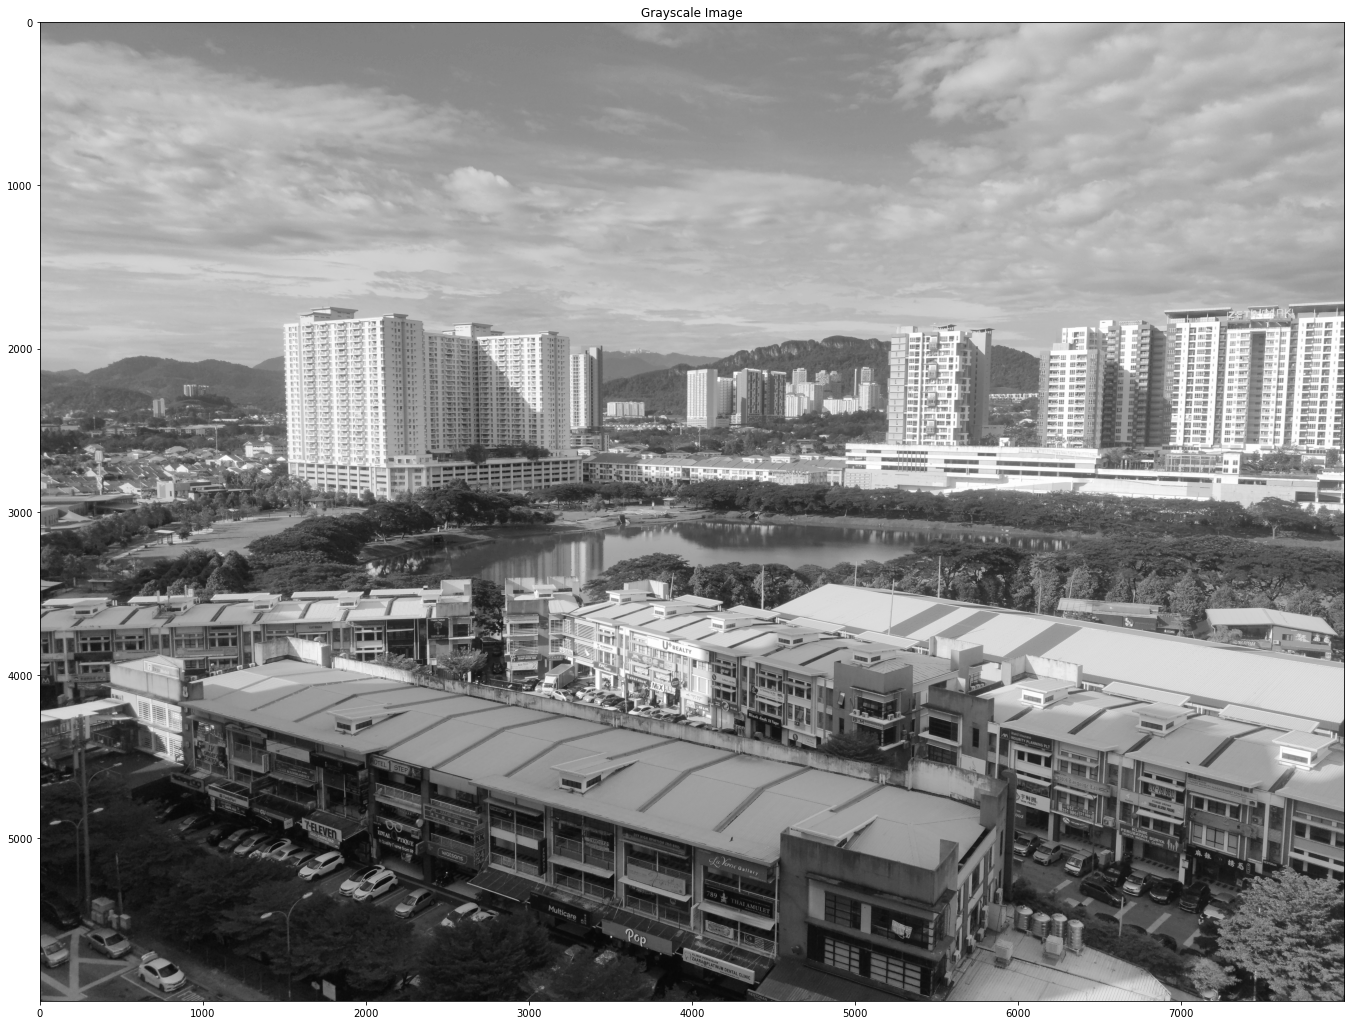

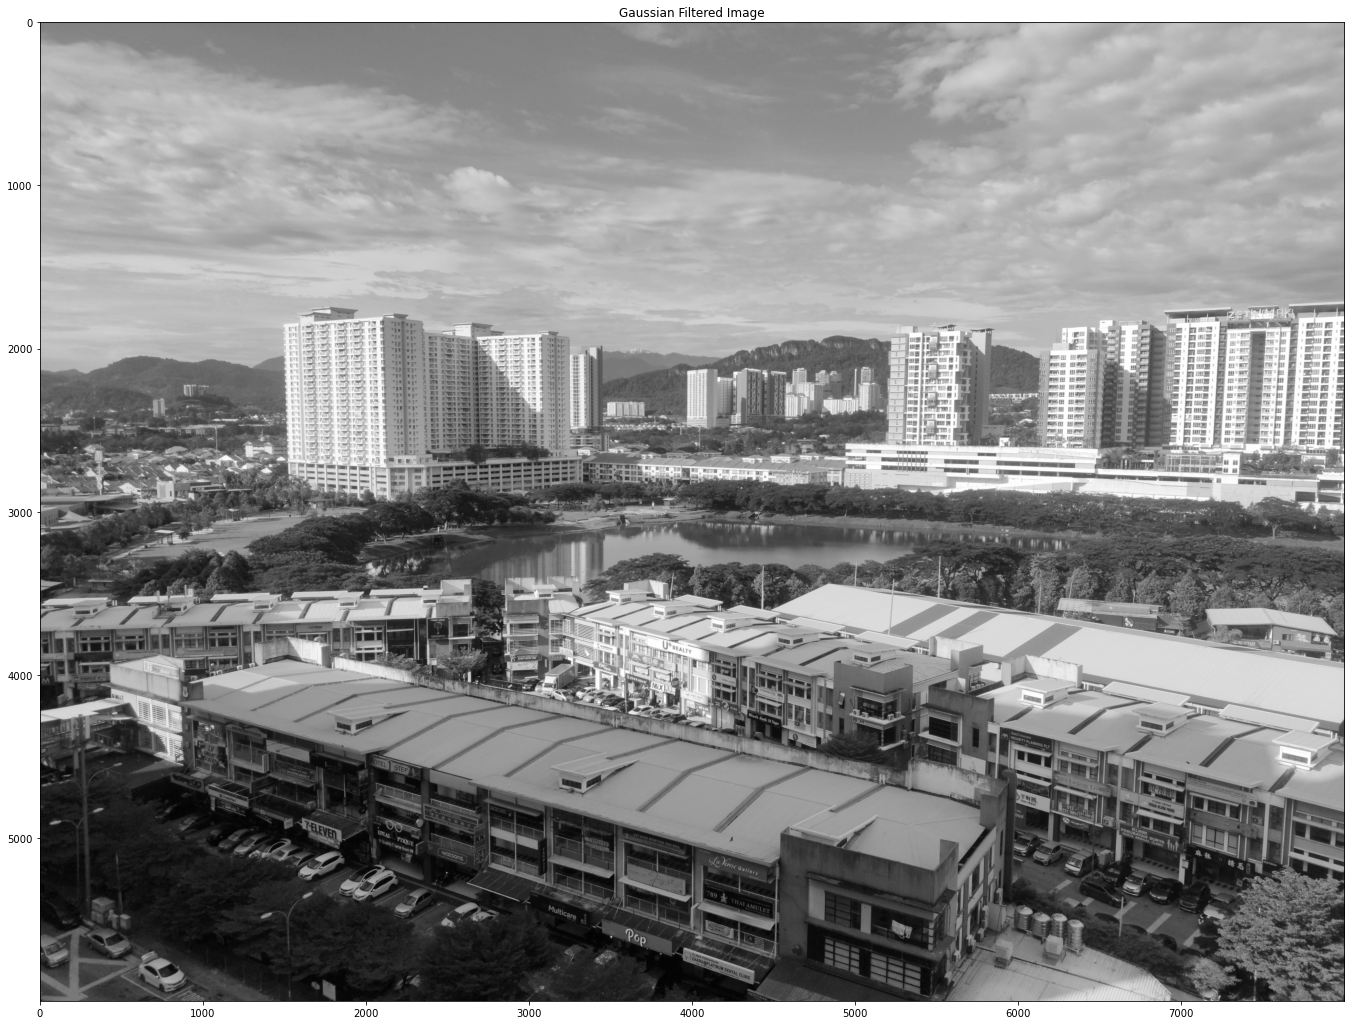

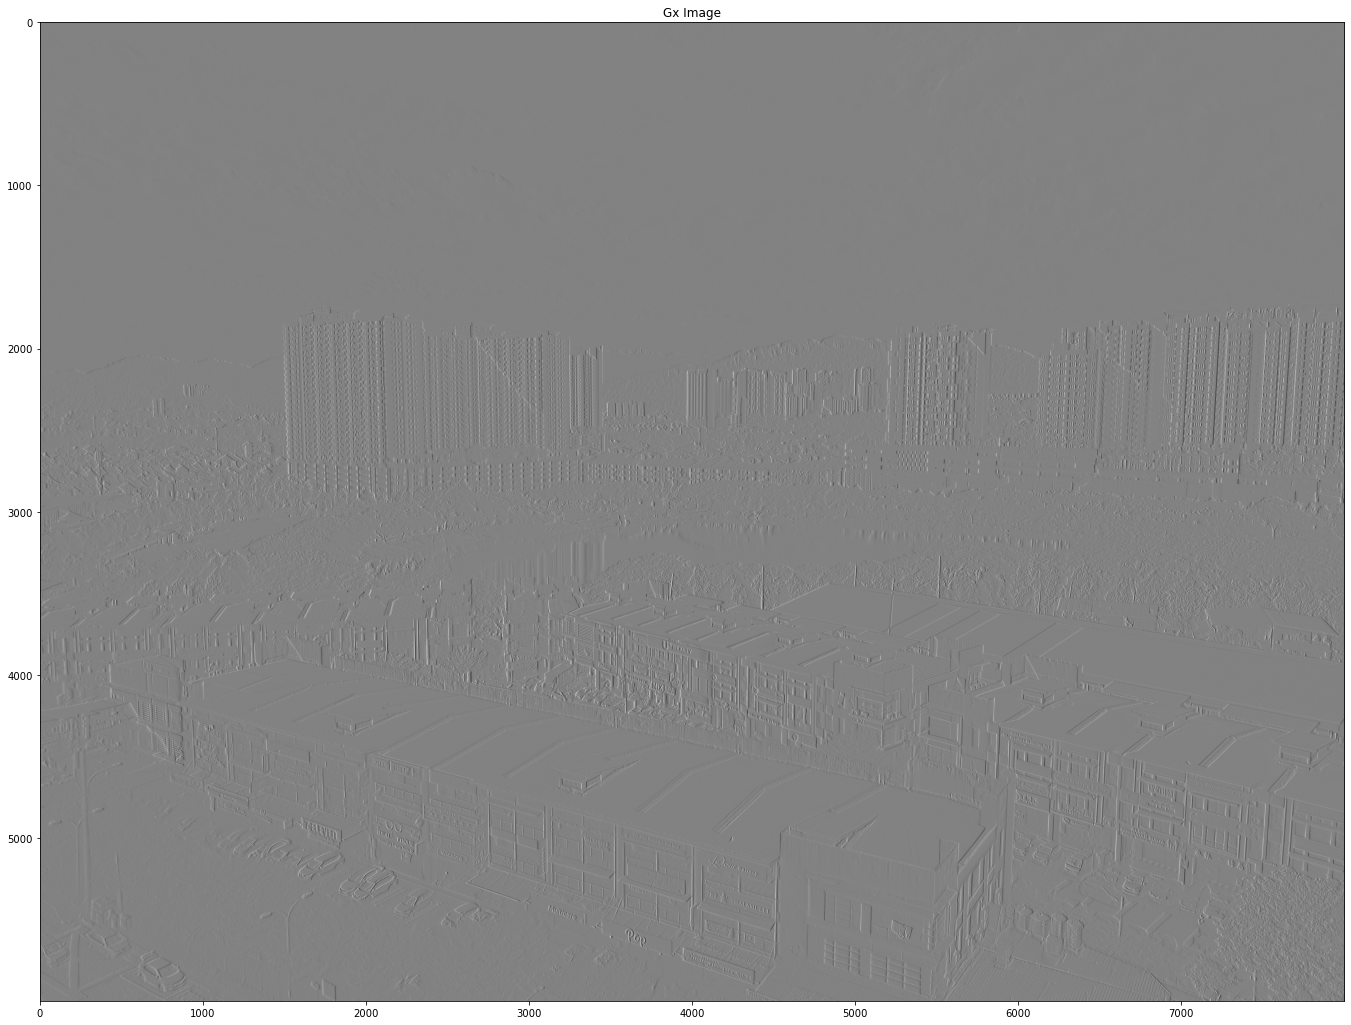

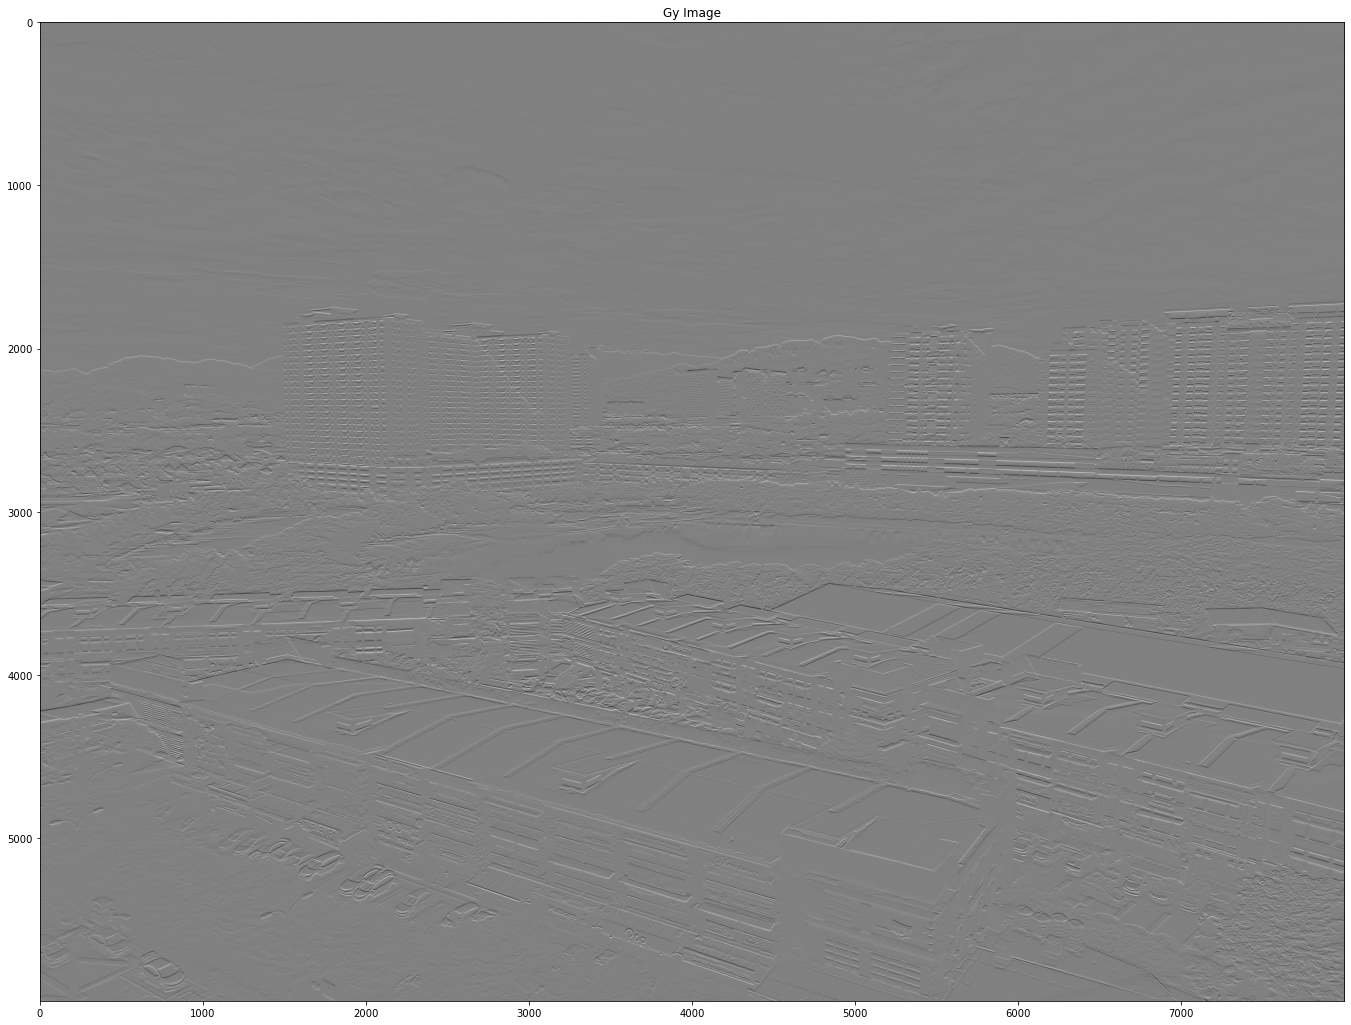

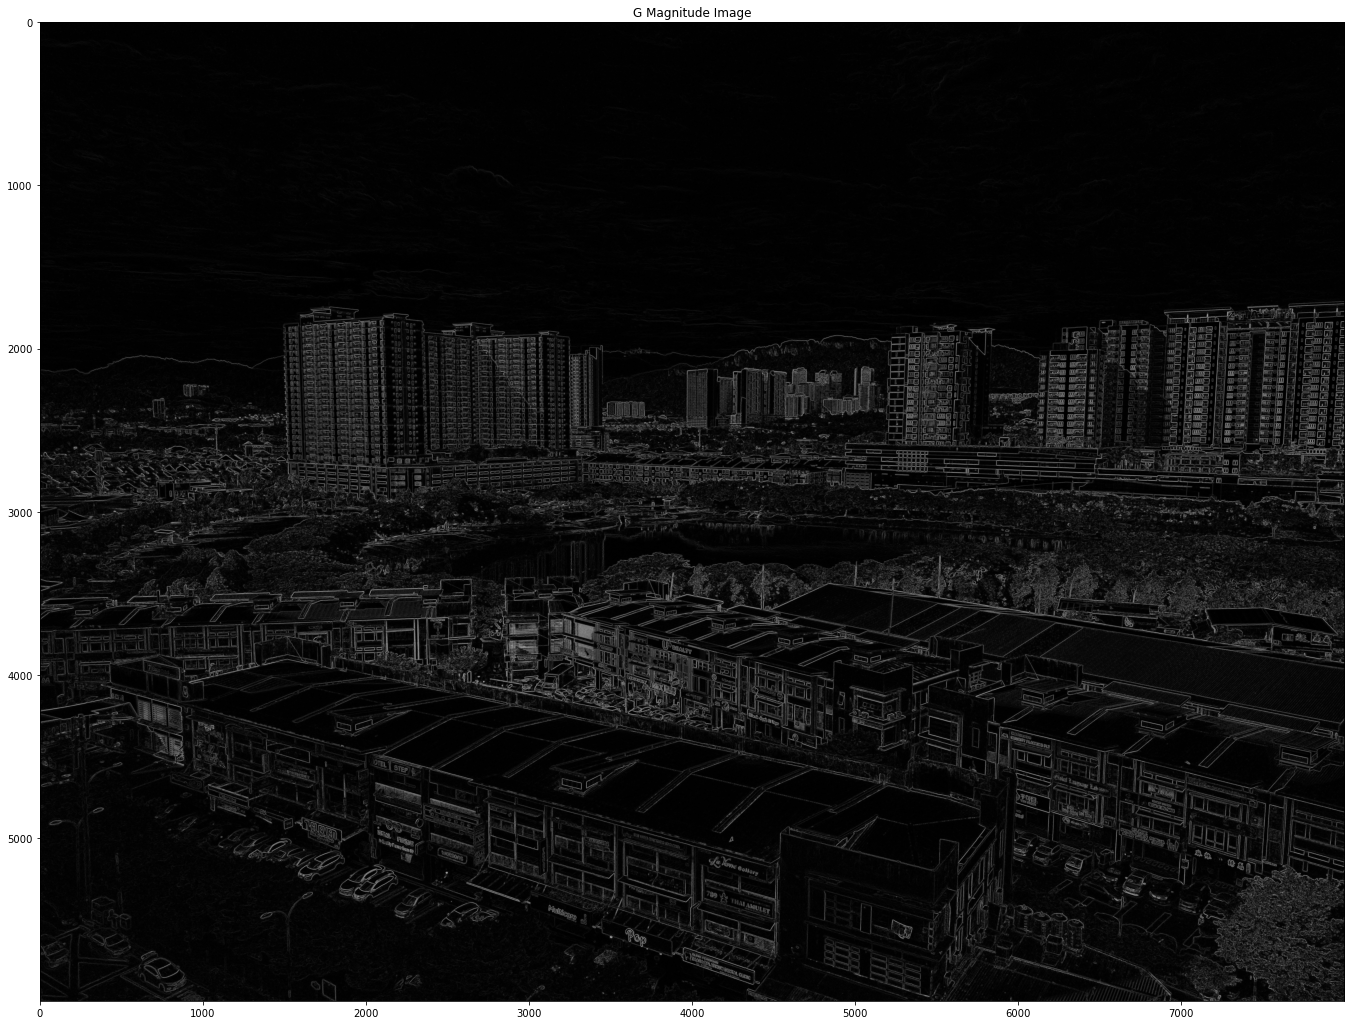

The time of execution of above program is : 72.48545384407043 seconds.


In [6]:
start = time.time()
# all the code

warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

width = 25
height = 18

imgColor = cv2.imread('pv_view.jpg')
plt.figure(figsize = (width,height))
plt.imshow(imgColor[...,::-1])
plt.title('Original Image')
plt.show()

imgGray = cv2.cvtColor(imgColor, cv2.COLOR_BGR2GRAY)
# Normalize image
imgGray = imgGray/(np.max(imgGray)/8)
plt.figure(figsize = (width,height))
plt.imshow(imgGray, cmap = plt.get_cmap('gray'))
plt.title('Grayscale Image')
plt.show()

imgBlur= cv2.GaussianBlur(imgGray,(5,5),0)
plt.figure(figsize = (width,height))
plt.imshow(imgBlur, cmap = plt.get_cmap('gray'))
plt.title('Gaussian Filtered Image')
plt.show()

Gtx = np.array([[1,0,-1], [2,0,-2],  [1,0,-1]])
Gx = ndimage.convolve(imgBlur, Gtx)

Gty = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Gy = ndimage.convolve(imgBlur, Gty)

plt.figure(figsize = (width,height))
plt.imshow(Gx, cmap = plt.get_cmap('gray'))
plt.title('Gx Image')
plt.show()

plt.figure(figsize = (width,height))
plt.imshow(Gy, cmap = plt.get_cmap('gray'))
plt.title('Gy Image')
plt.show()

Gmag = np.hypot(Gx,Gy)
Gangle = np.degrees(np.arctan2(Gy,Gx))

plt.figure(figsize = (width,height))
plt.imshow(Gmag, cmap = plt.get_cmap('gray'))
plt.title('G Magnitude Image')
plt.show()

M, N = Gmag.shape
Gnms = np.zeros((M,N))

end = time.time()
print("The time of execution of above program is :", end-start, "seconds.")